# Análisis por discriminación lineal (LDA)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Datos

Supongamos que tenemos dos distribuciones normales multivariadas. Es decir, cada distribución tiene media 0. Y cada distribución tiene 5000 muestras.

In [ ]:
mu0 = [0, 0] #vector de medias, siempre se puede asumir como 0,0
sigma0 = np.array([[1, 0.5], [0.5, 1]])      #es simetrica y positiva definida
sigma1 = np.array([[1, 0.5], [0.5, 1]])      #es simetrica y positiva definida

X = np.random.multivariate_normal(mu0, sigma0, 5000)  #para generar 5000 datos
X

array([[ 0.54725971,  0.2575734 ],
       [ 0.25927664,  1.28884215],
       [-0.49026735,  0.40796114],
       ...,
       [ 0.84118646,  0.35780442],
       [ 1.5579791 ,  1.26448953],
       [ 0.62329638,  0.64523698]])

In [ ]:
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

In [ ]:
y = np.ones((5000,))
y[:2000] = 0

In [ ]:
X[:6, :], y[:6]

(array([[ 0.54725971,  0.2575734 ],
        [ 0.25927664,  1.28884215],
        [-0.49026735,  0.40796114],
        [-1.51747246, -0.12875655],
        [-0.51709912, -0.50091097],
        [ 0.63187121,  0.4347917 ]]),
 array([0., 0., 0., 0., 0., 0.]))

### Visualización

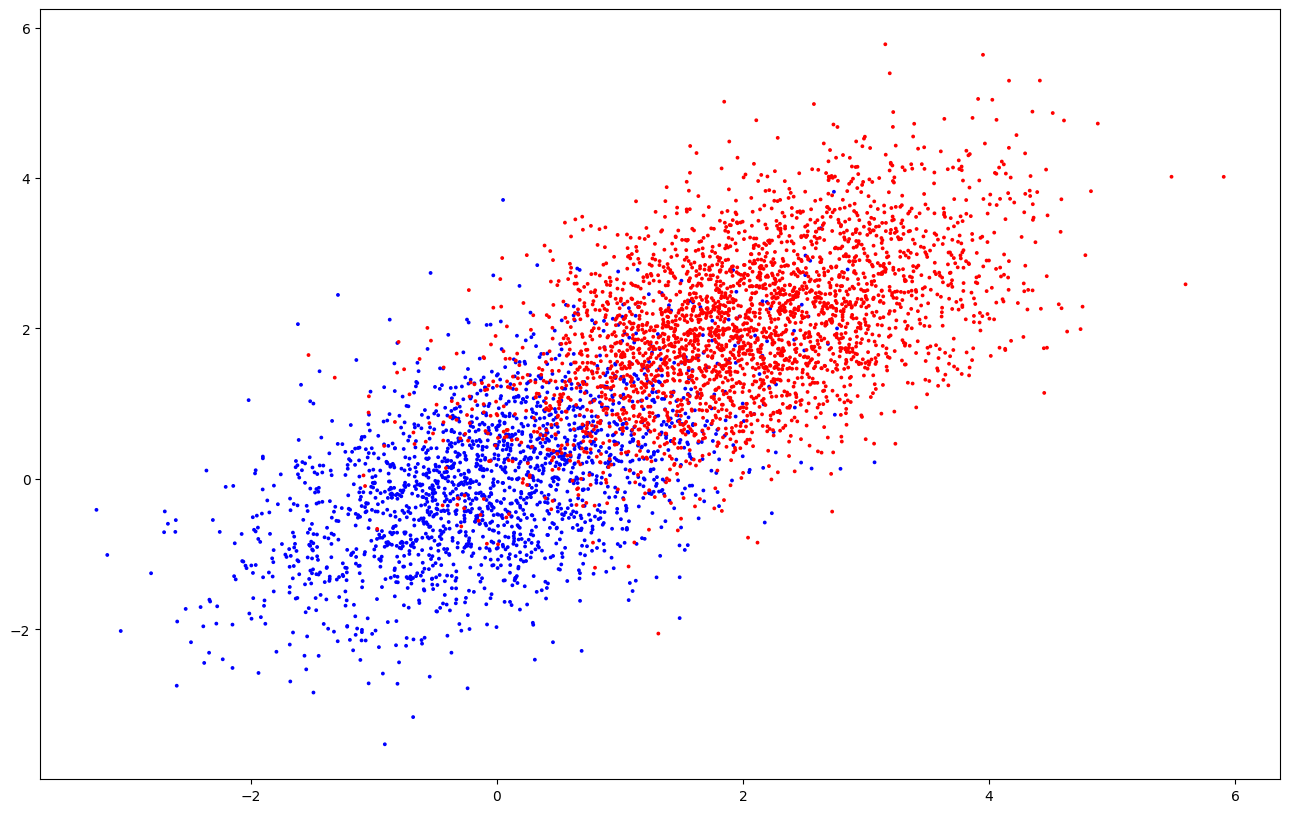

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

### Regla de Clasificación

Tenemos que:

$$ f(x \vert y) = \frac{1}{\vert 2 \pi \Sigma \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu)^T (\Sigma)^{-1} (x - \mu)\big) $$

En el caso de clasificación binaria (como el caso anterior), podemos expresar los dos tipos de casos de probabilidad condicional que $y=0$ y $y=1$.

$$ f(x \vert y=0) = \frac{1}{\vert 2 \pi \Sigma^{(0)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(0)})^T (\Sigma^{(0)})^{-1} (x - \mu^{(0)})\big)\\
f(x \vert y=1) = \frac{1}{\vert 2 \pi \Sigma^{(1)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(1)})^T (\Sigma^{(1)})^{-1} (x - \mu^{(1)})\big) $$


In [ ]:
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

In [ ]:
f_x_y_0(np.array([[0.5], [0.5]])) #funcion

0.1555632781262252

In [ ]:
f_x_y_1(np.array([[0.5], [0.5]]))

0.041006034909973794

Media muestral y covarianza muestral.

In [ ]:
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

(array([-0.02206828, -0.01685827]),
 array([[0.95856834, 0.49162796],
        [0.49162796, 1.01093071]]))

In [ ]:
mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

(array([2.0140464 , 2.02878467]),
 array([[1.03779076, 0.52195613],
        [0.52195613, 1.03441165]]))

In [ ]:
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

In [ ]:
fhat_x_y_0(np.array([[0.5], [0.5]]))

0.15513076859675168

In [ ]:
fhat_x_y_1(np.array([[0.5], [0.5]]))

0.040833430564858726

De hecho, ya conocemos la distribución de la etiqueta. Usando esto, podemos calcular la probabilidad de Bayes. La fórmula de la regla de Bayes es la siguiente:

$$ P(Y = y \vert X = x) = \frac{f(x \vert Y = y)P(Y = y)}{f(x \vert y = 0) P(Y = 0) + f(x \vert y=1)P(Y=1)} $$

In [ ]:
p0 = 2000/5000
p1 = 1 - p0

def bayes_prob(x, y):
    if y == 1:
        return f_x_y_1(x) * p1 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)
    else:
        return f_x_y_0(x) * p0 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 0)

0.7166425945408171

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 1)

0.2833574054591828

Also, we can estimate it with our hypothesis.

In [ ]:
p0_hat = 2000 / 5000
p1_hat = 3000 / 5000

def bayes_prob_hat(x, y):
    if y == 1:
        return fhat_x_y_1(x) * p1_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)
    else:
        return fhat_x_y_0(x) * p0_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)

bayes_prob_hat(np.array([[0.5], [0.5]]), 0), bayes_prob_hat(np.array([[0.5], [0.5]]), 1)

(0.716933695355426, 0.2830663046445741)

Se confirma que el dato (`[0.5], [0.5]`) se clsifica con la etiqueta `0`.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd', store_covariance=True).fit(X, y)

In [ ]:
lda.means_

array([[-0.02206828, -0.01685827],
       [ 2.0140464 ,  2.02878467]])

In [ ]:
mu0 = lda.means_[0, :]
mu1 = lda.means_[1, :]
lda_cov = lda.covariance_

mu0, mu1, lda_cov

(array([-0.02206828, -0.01685827]),
 array([2.0140464 , 2.02878467]),
 array([[1.00570252, 0.50962214],
        [0.50962214, 1.02461021]]))

Usando un discriminador entrenado, podemos calcular la probabilidad de cada etiqueta. Para hacer esto, necesitamos implementar la función delta para expresarlo.
La fórmula de la función delta es así.

$$ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu^T_k \Sigma^{-1} \mu_k + \log \pi_k $$



In [ ]:
def discriminator(x):
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(p0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(p1)
    return [d0[0], d1[0]]

[-0.9293519604430034, -1.8649167834941116]

In [ ]:
np.argmax(discriminator(np.array([[0.5], [0.5]])))

0

¿Qué pasa con la precisión del modelo LDA ajustado?

In [ ]:
y_hat = np.apply_along_axis(lambda x: np.argmax(discriminator(np.reshape(x, (2, 1)))), 1, X)

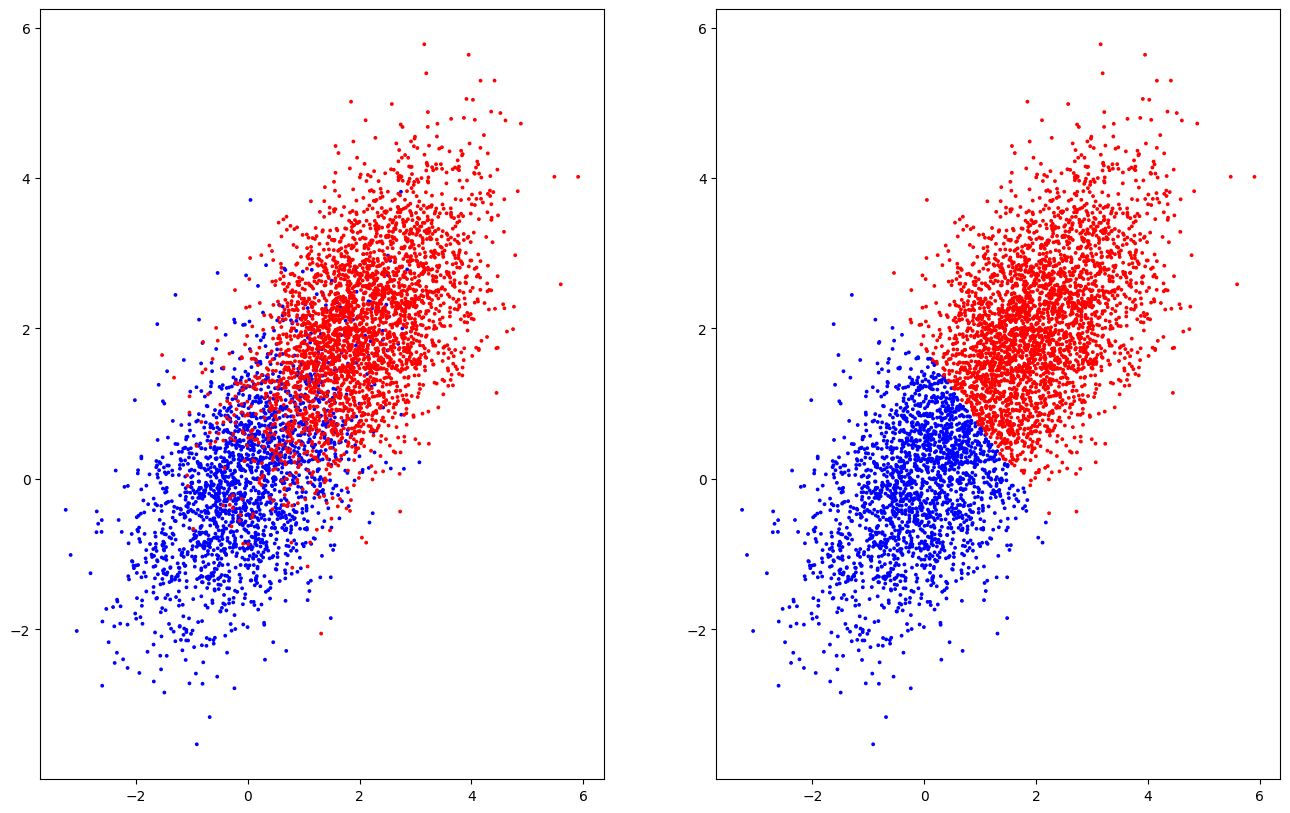

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
ax[1].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y_hat)))
plt.show()

In [ ]:
(y == y_hat).mean()

0.8836

segregación de datos


In [ ]:
import numpy as np

diccionario={"M1": np.random.binomial(1000,0.3,100),
             "M2": np.random.binomial(1000,0.6,100),
             "M3": np.random.binomial(1000,0.4,100),
             "M4": np.random.binomial(1000,0.8,100)}

In [ ]:
import pandas as pd

np.random.seed(1)

df= pd.DataFrame(diccionario)
df

,M1,M2,M3,M4
0,324,581,381,823
1,300,609,408,802
2,286,575,397,768
3,264,607,410,782
4,324,603,390,809
...,...,...,...,...
95,270,577,397,791
96,288,637,382,800
97,265,608,403,778
98,297,605,393,818


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      100 non-null    int64
 1   M2      100 non-null    int64
 2   M3      100 non-null    int64
 3   M4      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [ ]:
# PARA ESCOGER UNA COLUMNA

df['M1']

0     324
1     300
2     286
3     264
4     324
     ... 
95    270
96    288
97    265
98    297
99    284
Name: M1, Length: 100, dtype: int64

In [ ]:
np.mean(df['M1'])

298.59

In [ ]:
np.var(df['M1'], ddof=1)

261.5574747474747

In [ ]:
# PARA ESCOGER MÁS COLUMNAS

df[['M1', 'M2']]

,M1,M2
0,324,581
1,300,609
2,286,575
3,264,607
4,324,603
...,...,...
95,270,577
96,288,637
97,265,608
98,297,605


In [ ]:
df

,M1,M2,M3,M4
0,324,581,381,823
1,300,609,408,802
2,286,575,397,768
3,264,607,410,782
4,324,603,390,809
...,...,...,...,...
95,270,577,397,791
96,288,637,382,800
97,265,608,403,778
98,297,605,393,818


In [ ]:
df.iloc[0]

M1    324
M2    581
M3    381
M4    823
Name: 0, dtype: int64

In [ ]:
df.iloc[0].mean()

527.25

In [ ]:
df.iloc[99].mean()

524.5

In [ ]:
df.ndim

2

In [ ]:
df.mean(0)

M1    298.59
M2    599.13
M3    399.36
M4    798.83
dtype: float64

In [ ]:
df.mean(1)

0     527.25
1     529.75
2     506.50
3     515.75
4     531.50
       ...  
95    508.75
96    526.75
97    513.50
98    528.25
99    524.50
Length: 100, dtype: float64

In [ ]:
#PARA HACER SEGREGACIONES

df[0:51]

,M1,M2,M3,M4
0,324,581,381,823
1,300,609,408,802
2,286,575,397,768
3,264,607,410,782
4,324,603,390,809
5,299,620,379,822
6,305,572,390,780
7,304,590,412,797
8,287,611,361,789
9,293,582,408,793


In [ ]:

df[0::51]

,M1,M2,M3,M4
0,324,581,381,823
51,310,616,383,788


<Axes: ylabel='Frequency'>

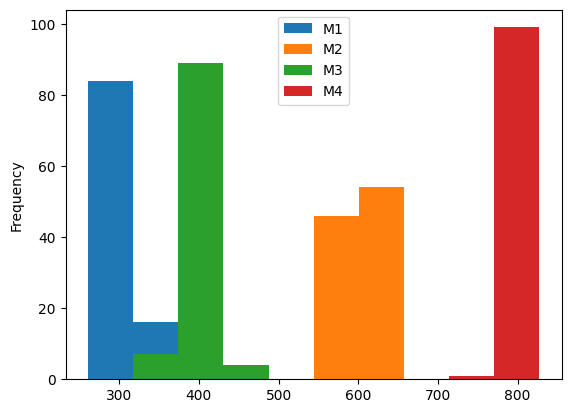

In [ ]:
df.plot.hist()

In [ ]:
df.max(axis=0)

M1    329
M2    637
M3    451
M4    827
dtype: int64

In [ ]:
# FILTRAR

df2=df[(df["M1"] > 300) ]
df2

,M1,M2,M3,M4
0,324,581,381,823
4,324,603,390,809
6,305,572,390,780
7,304,590,412,797
10,305,599,413,818
11,322,577,379,791
12,318,604,414,778
16,323,563,383,785
18,313,587,418,803
21,302,591,391,786


In [ ]:
df2.shape

(46, 4)